# 자료 가져오기

In [4]:
# 영상처리에 있어서 가장 많이 이용되는 Lena 이미지 활용하기
!wget http://www.lenna.org/len_top.jpg

--2019-02-01 09:53:46--  http://www.lenna.org/len_top.jpg
Resolving www.lenna.org (www.lenna.org)... 107.180.37.106
Connecting to www.lenna.org (www.lenna.org)|107.180.37.106|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32468 (32K) [image/jpeg]
Saving to: ‘len_top.jpg’

len_top.jpg         100%[===================>]  31.71K  14.7KB/s    in 2.2s    

2019-02-01 09:53:50 (14.7 KB/s) - ‘len_top.jpg’ saved [32468/32468]



## Objective

1. python을 통해 어떤 식으로 이미지를 읽어들이는가
2. 영상의 구조에 대한 이해
3. 색상값 처리에 대한 이해


<h1 style = "background-color: rgba(185, 109, 106, 0.3);" > 컴퓨터에서의 영상이란?</h1>

<hr>
## 1. 영상을 불러오기

> 영상은 matplotlib이나, opencv로 불러올 수 있습니다.


In [3]:
# 영상처리에 있어서 핵심적인 matplotlib과 opencv , numpy 가져오기
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

> matplotlib과 opencv에서는 다양한 이미지 포맷(.jpg, .png, .tif 등)을 읽어올 수 있는 메소드가 구현되어 있습니다.

**1. matplotlib으로 읽어오기**

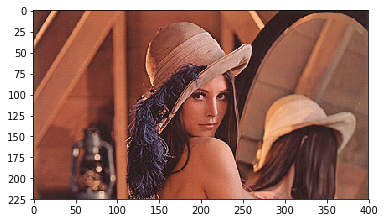

In [4]:
image = plt.imread("./len_top.jpg") # jpg 파일로 부터 읽어오기

# matplotlib으로 영상을 jupyter에서 보여주기
plt.imshow(image)
plt.show()

**2. opencv로 읽어오기**

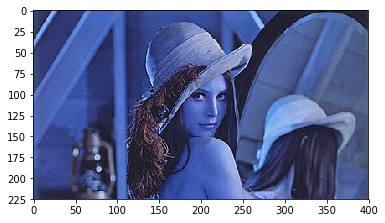

In [5]:
image = cv2.imread("./len_top.jpg") # cv2.imread로 읽어오기

plt.imshow(image)
plt.show()

> opencv에서는 기본적으로 RGB 순서로 읽어오지 않고, BGR 순서로 읽어오기 때문에, `cv2.cvtColor`를 통해 영상의 채널 순서를 바꾸어 주어야 합니다.

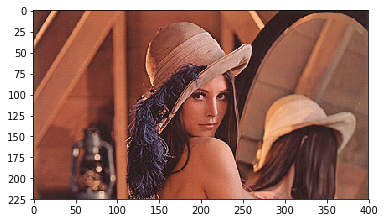

In [6]:
image = cv2.imread("./len_top.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

<hr>
## 2. 영상의 구조, 3차원 행렬

> 영상은 기본적으로 픽셀의 집합으로 이루어져 있는, (세로 X 가로 X 채널(RGB))로 이루어진 3차원 Matrix입니다.


In [7]:
image = plt.imread("./len_top.jpg") # jpg 파일로 부터 읽어오기
image.shape 

(225, 400, 3)

> 현재 이미지는 height가 225, width가 400, Channel이 3인 행렬로 구성되어 있습니다.

**이미지의 원소에 접근하기**

![](../misc/image_matrix.png)

> 영상에서의 (x,y)의 위치는 반대 순서로 image[y,x]로 접근해야 합니다.

In [8]:
image[0,10] # (x,y) = (10,0)에 접근하기

array([109,  60,  55], dtype=uint8)

> (x,y) = (10,0)의 위치에는 
  (Red, Green, Blue) = (109, 60, 55)으로 픽셀이 구성되어 있습니다.

**이미지에서 특정 영역을 가져오기**

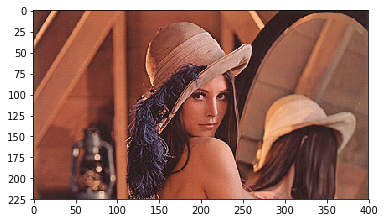

In [9]:
plt.imshow(image)
plt.show()

> Numpy에서 이용되는 범위 Index방식으로 가져오고 싶은 부분만 가져올 수 있습니다.

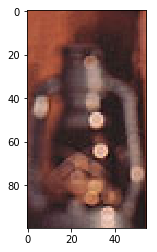

In [10]:
## lamp 부분만 가져오기
lamp_image = image[125:225,45:100]
plt.imshow(lamp_image)
plt.show()

<hr>
### 예제1. 레나의 얼굴만 가져오기
Q. 레나의 얼굴 부분만 가져와서, `plt.imshow`를 통해 jupyter에서 보여주기

![](misc/question_1.png)

In [11]:
# 코드를 입력해 보세요


[정답 위치](#정답1.-레나의-얼굴만-가져오기)

<hr>
<h1 style = "background-color: rgba(185, 109, 106, 0.3);" > II. 영상에서의 색상값을 처리하기</h1>

> 색상 값 변경, 명도 채도 변경 등을 통해 영상의 색상을 원하는 대로 변경하는 법을 배워봅니다.

<hr>
## 1. 영상의 색상 값 보정하기

> 영상의 채널 별로 값을 키우거나 줄이면서, 영상의 특성을 변경할 수 있습니다.

In [12]:
# plt.imread로 불러올 경우에는, 객체 변경이 불가능하도록 제한이 걸려 있어,
# cv2.imread를 통해 불러와야 조작이 가능합니다.
image = cv2.imread("./len_top.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

**1. 특정 채널의 색상 값을 변경하기**

> numpy의 사칙연산인 `+`, `-`, `x`를 통해 색상을 증폭 혹은 감쇄를 해보겠습니다.

In [13]:
image.dtype 

dtype('uint8')

> 영상은 기본적으로 `np.uint8`이라는 datatype으로 이루어져 있습니다. uint8은 0~255까지의 범위를 가지는 정수 체계로, OverFlow의 문제가 쉽게 발생합니다. 

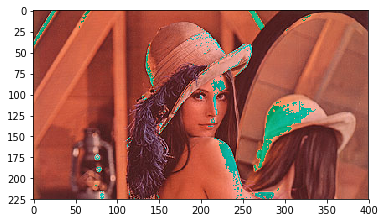

In [14]:
image[:,:,0] = image[:,:,0] + 30 # red 채널에 30을 더했을 때
plt.imshow(image)
plt.show()

> 오버플로우가 발생하여 특정 부분의 색상값이 뒤집혔습니다. 그것을 방지하기 위해서는, 0아래의 숫자는 모두 0으로, 255이상은 모두 255로 표현해주어야 합니다. opencv에서는 기본적으로 `cv2.add` 내부에 그러한 기능을 가지고 있습니다.

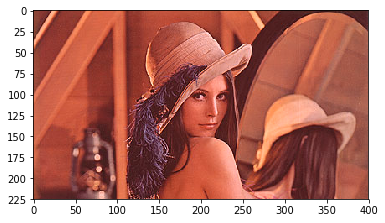

In [15]:
image = cv2.imread("./len_top.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image[:,:,0] = cv2.add(image[:,:,0], 30) # Red 채널의 값을 키우기
plt.imshow(image)
plt.show()

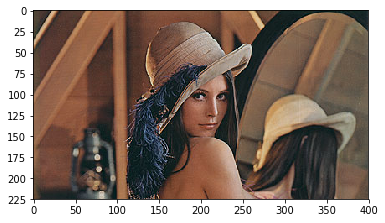

In [16]:
image = cv2.imread("./len_top.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image[:,:,0] = cv2.subtract(image[:,:,0], 30) # red 채널의 값을 줄이기
plt.imshow(image)
plt.show()

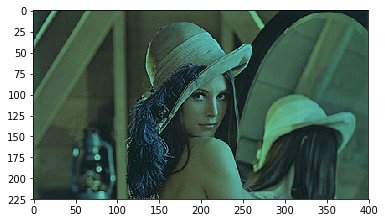

In [17]:
image = cv2.imread("./len_top.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image[:,:,0] = cv2.multiply(image[:,:,0], 0.4) # Red 채널의 값에 0.4를 곱하기
plt.imshow(image)
plt.show()

<hr>
### 예제2. 영상에 초록빛이 돌도록 보정하기
Q. 영상의 초록색 채널에 1.5를 곱하여서, 보다 초롯빛이 잘 돌도록 디자인해주세요

In [18]:
# 해당 셀에 답을 입력해주세요.


[정답 위치](#정답2.-영상에-초록빛이-돌도록-보정하기)

<hr>
## 2. 영상의 채도 및 명도 값 보정하기

> 영상의 색공간을 RGB에서 색상(Hue), 채도(Saturation) 명도(Value)를 표현할 수 있는 HSV 색공간으로 이전하여 영상의 값을 보정합니다.

* **Hue** :  
    
    가시광선 스펙트럼을 고리모양으로 배치한 색상환에서 가장 파장이 긴 빨강을 0°로 하였을 때 상대적인 배치 각도를 의미한다. 때문에 H 값은 0°~360°의 범위를 갖고 360°와 0°는 같은 색상 빨강을 가리킨다.
    
* **Saturation** : 
    
    채도값 S는 특정한 색상의 가장 진한 상태를 100%로 하였을 때 진함의 정도를 나타낸다. 채도값 0%는 같은 명도의 무채색을 나타낸다.

* **Value** : 
    
    명도값 V는 흰색, 빨간색 등을 100%, 검은색을 0%로 하였을 때 밝은 정도를 나타낸다.

In [19]:
image = cv2.imread("./len_top.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

> RGB 색공간에서 HSV의 색공간으로 바꾸기 위해서는 아래와 같은 변환수식을 거쳐야 합니다.

$$
V = max(R,G,B)
$$
$$
S = \begin{cases}
\frac{V-min(R,G,B)}{V} & \mbox{if }n \neq 0 \\
0 & \mbox{if }n = 0
\end{cases}
$$

$$
H = \begin{cases}
\frac{60(G-B)}{V-min(R,G,B)} & \mbox{if }V = R \\
120+\frac{60(B-R)}{V-min(R,G,B)} & \mbox{if }V = G \\
240+\frac{60(R-G)}{V-min(R,G,B)} & \mbox{if }V = B
\end{cases}
$$

> opencv에서는 위의 변환수식을 아래와 같이 간편히 적용할 수 있습니다.

In [20]:
image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
H = image[:,:,0] # Hue
S = image[:,:,1] # Saturation
V = image[:,:,2] # Value

#### 채도(Saturation) 값을 바꾸기

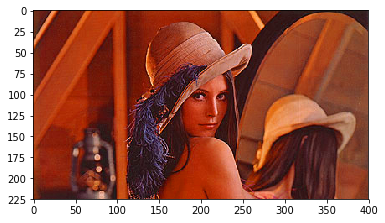

In [21]:
# 채도 값을 높였을 때
image = cv2.imread("./len_top.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
image[:,:,1] = cv2.multiply(image[:,:,1],1.5)
image = cv2.cvtColor(image, cv2.COLOR_HSV2RGB)

plt.imshow(image)
plt.show()

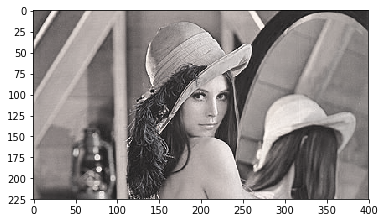

In [22]:
# 채도 값을 낮추었을 때
image = cv2.imread("./len_top.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
image[:,:,1] = cv2.multiply(image[:,:,1],0.1)
image = cv2.cvtColor(image, cv2.COLOR_HSV2RGB)

plt.imshow(image)
plt.show()

#### 명도값 바꾸기

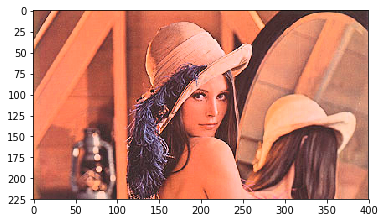

In [23]:
# 명도 값을 높였을 때
image = cv2.imread("./len_top.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
image[:,:,2] = cv2.multiply(image[:,:,2],1.5)
image = cv2.cvtColor(image, cv2.COLOR_HSV2RGB)

plt.imshow(image)
plt.show()

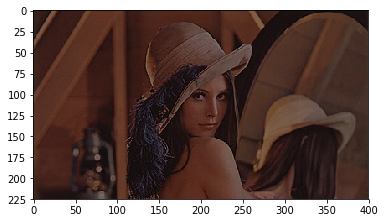

In [24]:
# 명도 값을 낮추었을 때
image = cv2.imread("./len_top.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
image[:,:,2] = cv2.multiply(image[:,:,2],0.5)
image = cv2.cvtColor(image, cv2.COLOR_HSV2RGB)

plt.imshow(image)
plt.show()

하지만 일반적으로 명도는 다음과 같이 단순하게 곱하기로 밝게 만들거나, 어둡게 만들지는 않는다. 보다 조명이 밝았을 때와 어두웠을 때의 느낌을 살리기 위해서는, 감마 보정(gamma correction)이라고 불리는 방식을 택한다. 

감마 보정식은 아래와 같다

$V_c = V_s^{\frac{1}{\gamma}}$

Gamma의 값에 따른 변화는 아래와 같다

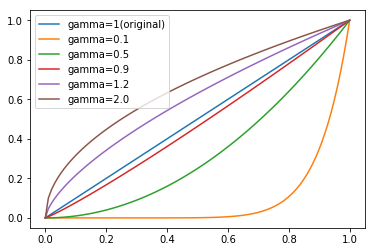

In [60]:
xs = np.linspace(0,1,100)
gamma_1 = xs**(1/0.1)
gamma_5 = xs**(1/0.5)
gamma_9 = xs**(1/0.9)
gamma_15 = xs**(1/1.5)
gamma_20 = xs**(1/2.0)

plt.plot(xs,xs,label='gamma=1(original)')
plt.plot(xs,gamma_1,label='gamma=0.1')
plt.plot(xs,gamma_5,label='gamma=0.5')
plt.plot(xs,gamma_9,label='gamma=0.9')
plt.plot(xs,gamma_15,label='gamma=1.2')
plt.plot(xs,gamma_20,label='gamma=2.0')

plt.legend()
plt.show()


일반적으로 사람들은 gamma correction을 통한 밝기 변화가 +, \*로 단순하게 변화주는 것보다 좀더 

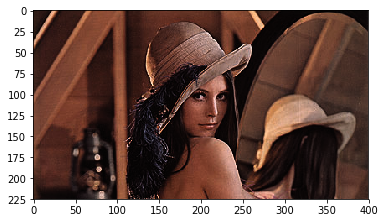

In [44]:
gamma = 0.5 # 작아질수록 어두워지고 커질수록 밝아짐

image = cv2.imread("./len_top.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
value = image[:,:,2]
adjusted_value = (((value/255)**(1/gamma))*255).astype(np.uint8)
image[:,:,2] = adjusted_value

image = cv2.cvtColor(image, cv2.COLOR_HSV2RGB)

plt.imshow(image)
plt.show()

<hr>
<h1 style = "background-color: rgba(185, 109, 106, 0.3);" > 예제문제 정답 </h1>

#### 정답1. 레나의 얼굴만 가져오기

[문제로 이동](#예제1.-레나의-얼굴만-가져오기)

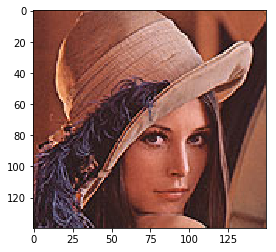

In [56]:
image = plt.imread("./len_top.jpg")
face = image[20:160,120:270]
plt.imshow(face)
plt.show()

#### 정답2. 영상에 초록빛이 돌도록 보정하기

[문제로 이동](#예제2.-영상에-초록빛이-돌도록-보정하기)

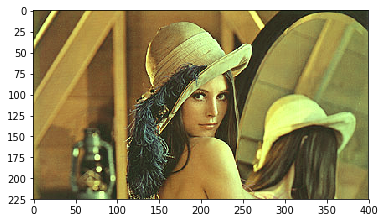

In [57]:
image = cv2.imread("./len_top.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image[:,:,1] = cv2.multiply(image[:,:,1], 1.5)

plt.imshow(image)
plt.show()

<hr>

Copyright(c) 2019 by Public AI. All rights reserved. last updated on 2019/02/01<br>
Writen by PAI, SangJae Kang(rocketgrowthsj@publicai.co.kr) 
<hr>